In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/News Classification/BBC News Train.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
print(df['Category'].unique())

['business' 'tech' 'politics' 'sport' 'entertainment']


In [ ]:
category = df['Category'].value_counts()

Text(0.5, 1.0, 'Category Point Distribution')

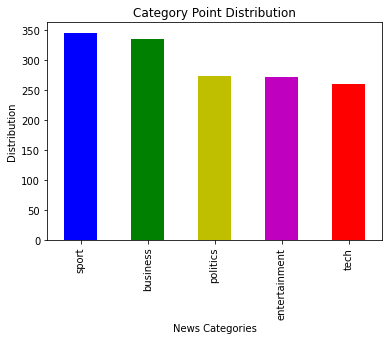

In [ ]:
category.plot(kind = 'bar',color = ['b','g','y','m','r'] )
plt.xlabel("News Categories")
plt.ylabel("Distribution")
plt.title("Category Point Distribution")

In [ ]:
 df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [ ]:
df2 = df.drop(columns='Category')

In [ ]:
df2.head()

,ArticleId,Text
0,1833,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...


Data Procesing

In [ ]:
from nltk.corpus import stopwords
import nltk
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
print('Stop_words:',stop_words)
print("Total Stop words:",len(stop_words))

Stop_words: {'no', "should've", 'some', 'where', 'wouldn', "hadn't", 'didn', 'do', 'to', 'it', 'hers', 'ours', 'these', 't', 'because', 'which', 'both', 'same', 's', 'weren', 'are', "don't", 'your', 'did', "you're", 'by', 'ma', 'during', 'of', 'we', 'under', 'how', 'itself', 'with', 'should', 'those', 'our', 'above', "hasn't", 'is', "wouldn't", "doesn't", 'on', 'himself', "couldn't", 'few', 'haven', 'isn', 'doing', 'such', 'am', 'other', 'hadn', 'them', 'been', "it's", 'each', 'needn', 'after', 'any', 'you', 'his', 'before', 'into', "didn't", 'yourself', 'whom', 'for', 've', 'up', 'have', 'she', 'this', "mightn't", 'they', 'further', 'were', 'o', 'theirs', 'll', 'below', 'off', 'in', 'had', "she's", 'then', 'so', 'd', 'does', 'ourselves', 'ain', 'my', 'as', 'through', "weren't", 'shouldn', "that'll", 'myself', 'a', "won't", 'and', 'down', 'me', 'doesn', 'only', 'who', "aren't", 'hasn', 'an', 'if', 'couldn', 'too', 'more', 'or', 'was', 'won', 'themselves', 'now', 'her', 'over', 'most', 

In [ ]:
for id, sentence in df.iterrows():
  if type(sentence['Text']) is not int :
    string = ' '

    data = re.sub('[^a-zA-Z0-9\n]',' ',sentence['Text'])
    data = re.sub('\s+',' ', data)
    data = data.lower()

  for word in data.split():
    if word not in stop_words:
      string = string + word +" "

  df['Text'][id] = string
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex boss launches defence lawyers def...,business
1,154,german business confidence slides german busi...,business
2,1101,bbc poll indicates economic gloom citizens ma...,business
3,1976,lifestyle governs mobile choice faster better...,tech
4,917,enron bosses 168m payout eighteen former enro...,business


In [ ]:
print(df['Text'][0])
len(df['Text'][0])

 worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness cynthia cooper worldcom ex head internal accounting alerted directors irregular accounting practices us telecoms giant 2002 warnings led collapse firm following discovery 11bn 5 7bn accounting fraud mr ebbers pleaded guilty charges fraud conspiracy prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates ms cooper runs consulting business told jury new york wednesday external auditors arthur andersen approved worldcom accounting early 2001 2002 said andersen given green light procedures practices used worldcom mr ebber lawyers said unaware fraud arguing auditors alert problems ms cooper also said shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answers prosecution star witne

1429

In [ ]:
print(df2['Text'][0])
len(df2['Text'][0])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebbe

1866

In [ ]:
df.drop("ArticleId", axis=1)

,Text,Category
0,worldcom ex boss launches defence lawyers def...,business
1,german business confidence slides german busi...,business
2,bbc poll indicates economic gloom citizens ma...,business
3,lifestyle governs mobile choice faster better...,tech
4,enron bosses 168m payout eighteen former enro...,business
...,...,...
1485,double eviction big brother model caprice hol...,entertainment
1486,dj double act revamp chart show dj duo jk joe...,entertainment
1487,weak dollar hits reuters revenues media group...,business
1488,apple ipod family expands market apple expand...,tech


# **Data spliting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x = df['Text']
y = df['Category']

In [ ]:
X_train, X_test , y_train ,y_test = train_test_split(x,y , train_size=0.2)

In [ ]:
Vectorizer = TfidfVectorizer()
Xv_train = Vectorizer.fit_transform(X_train)
Xv_test = Vectorizer.transform(X_test)

In [ ]:
print(Xv_test)

  (0, 1)	0.06751380900431381
  (0, 39)	0.14116463343876465
  (0, 482)	0.07058231671938232
  (0, 524)	0.04103495592407043
  (0, 579)	0.2976131938740791
  (0, 627)	0.06761853301974903
  (0, 694)	0.05599059235990707
  (0, 746)	0.061375963665075965
  (0, 752)	0.13039389082842684
  (0, 837)	0.03703569015719667
  (0, 838)	0.023551436983723917
  (0, 1032)	0.053026808660273775
  (0, 1052)	0.06519694541421342
  (0, 1055)	0.03703569015719667
  (0, 1123)	0.07440329846851977
  (0, 1124)	0.15957733954737735
  (0, 1357)	0.03843508430079852
  (0, 1424)	0.06314952226678802
  (0, 1756)	0.042963257556463255
  (0, 1758)	0.03999947385682996
  (0, 2387)	0.04624204321150303
  (0, 2414)	0.05714627397958957
  (0, 2435)	0.07460804341116206
  (0, 2529)	0.061375963665075965
  (0, 2749)	0.03730402170558103
  :	:
  (1191, 6854)	0.11097030250697903
  (1191, 7085)	0.05090549098617144
  (1191, 7266)	0.05781440417453214
  (1191, 7697)	0.1254446330603977
  (1191, 7783)	0.060897345731874726
  (1191, 7787)	0.067547310846

In [ ]:
print(Xv_train)

  (0, 6916)	0.04646675631065251
  (0, 4747)	0.04189671495546336
  (0, 6711)	0.07636439249679718
  (0, 7108)	0.09345550250375652
  (0, 889)	0.06210965872187809
  (0, 7176)	0.09345550250375652
  (0, 5080)	0.09345550250375652
  (0, 9984)	0.07188892285384947
  (0, 3900)	0.04218217248287851
  (0, 4658)	0.037071635122005474
  (0, 8566)	0.07636439249679718
  (0, 3978)	0.06210965872187809
  (0, 3163)	0.09345550250375652
  (0, 10366)	0.07188892285384947
  (0, 5425)	0.06693473855533597
  (0, 1778)	0.09345550250375652
  (0, 1321)	0.07005657231479137
  (0, 7315)	0.07005657231479137
  (0, 9231)	0.06110563302889595
  (0, 2842)	0.05927328248983785
  (0, 3581)	0.06433587836822531
  (0, 5362)	0.06110563302889595
  (0, 7887)	0.07005657231479137
  (0, 2635)	0.054162745128964816
  (0, 6234)	0.09697998532976865
  :	:
  (297, 10223)	0.0516835910354531
  (297, 10510)	0.0352822824946966
  (297, 5412)	0.08646048900731589
  (297, 15)	0.03648710665879933
  (297, 3575)	0.04323024450365794
  (297, 8955)	0.05427838

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(Xv_train , y_train)

LogisticRegression()

In [ ]:
LR_Score = LR.score(Xv_train, y_train)

In [ ]:
pre = LR.predict(Xv_test)

In [ ]:
print(pre)

['business' 'sport' 'entertainment' ... 'tech' 'sport' 'sport']


# **MultinominalNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB().fit(Xv_train, y_train)

In [ ]:
clf_Score = clf.score(Xv_train, y_train)

In [ ]:
clf_pre = clf.predict(Xv_test)

In [ ]:
print(clf_pre)

['business' 'sport' 'entertainment' ... 'tech' 'sport' 'sport']


## **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNC = KNeighborsClassifier().fit(Xv_train,y_train)


In [ ]:
KNC.predict(Xv_test)

array(['business', 'sport', 'entertainment', ..., 'tech', 'sport',
       'sport'], dtype=object)

In [ ]:
KNC_score = KNC.score(Xv_train, y_train)

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
SV = SVC().fit(Xv_train, y_train)

In [ ]:
SV.predict(Xv_test)

array(['business', 'sport', 'entertainment', ..., 'tech', 'sport',
       'sport'], dtype=object)

In [ ]:
Sv_score = SV.score(Xv_train, y_train)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier().fit(Xv_train, y_train)

In [ ]:
predict = DT.predict(Xv_test)

In [ ]:
DT_score = DT.score(Xv_train, y_train)

# **Comparing algorithm Performance**

In [ ]:
from tabulate import tabulate

In [ ]:
table = [["logistic Regression",LR_Score],["MultiNominalNB",clf_Score],["Support Vector Machine",Sv_score],["Decision Tree",DT_score],["KNeighborsClassifier",KNC_score]]

In [ ]:
print(tabulate(table, headers=['Classification', 'Score']))

Classification             Score
----------------------  --------
logistic Regression     1
MultiNominalNB          1
Support Vector Machine  1
Decision Tree           1
KNeighborsClassifier    0.969799


In [ ]:
import pickle

In [ ]:
file = open('SV.pkl','wb')

In [ ]:
pickle.dump(SV,file)